# **OCR using Convolutional Neural Networks.**
 **On [MNIST](http://yann.lecun.com/exdb/mnist/) dataset.**

### **Knowing the shape and exploring the dataset.**
**Importing [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, from TensorFlow Keras.**



In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()  # data is imported from mnist (tensorflow dataset library)
print('Shape of the dataset.')
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

11490434/11490434 [==============================] - 0s 0us/step
Shape of the dataset.
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [ ]:
train_labels_count = np.unique(y_train, return_counts=True)
test_labels_count = np.unique(y_test, return_counts=True)
dataframe_labels = pd.DataFrame({'Label':train_labels_count[0], 'Count Train':train_labels_count[1],'Count Test':test_labels_count[1]})
print(dataframe_labels.to_string(index=False))

 Label  Count Train  Count Test
     0         5923         980
     1         6742        1135
     2         5958        1032
     3         6131        1010
     4         5842         982
     5         5421         892
     6         5918         958
     7         6265        1028
     8         5851         974
     9         5949        1009


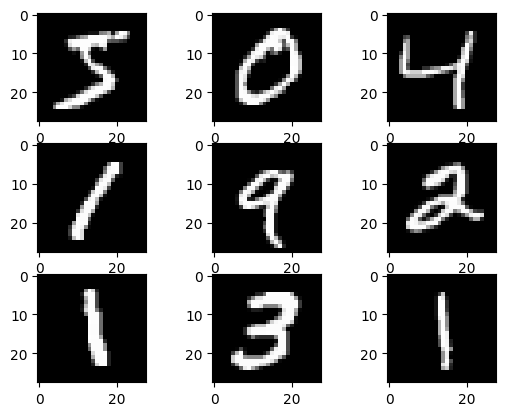

In [ ]:
# 9 sample images of the dataset
for i in range(9):
	plt.subplot(331 + i)
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
print('Train dataset ranges from ', X_train.min(),' to ', X_train.max(),'.')
print('Train dataset mean value:', round(X_train.mean(),3))
print('Test dataset ranges from ', X_test.min(),' to ', X_test.max(),'.')
print('Test dataset mean value: ', round(X_test.mean(),3))

Train dataset ranges from  0  to  255 .
Train dataset mean value: 33.318
Test dataset ranges from  0  to  255 .
Test dataset mean value:  33.791


### **Reshaping and Normalizing the dataset**

Reshaping the array to 4-dims so that it can work with the Keras API.

Rescale pixel values from the range of 0-255 to the range 0-1 preferred for neural network models.

In [ ]:
# Reshaping
# (sample index, height, width, colour channel)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize
# divided by 255 (pixel values are from 0 to 255) to get values between 0 and 1
X_train /= 255.0
X_test /= 255.0
print('Train dataset ranges from ', X_train.min(),' to ', X_train.max(),'.')
print('Train dataset mean value:', round(X_train.mean(),3))
print('Test dataset ranges from ', X_test.min(),' to ', X_test.max(),'.')
print('Test dataset mean value: ', round(X_test.mean(),3))


Train dataset ranges from  0.0  to  1.0 .
Train dataset mean value: 0.131
Test dataset ranges from  0.0  to  1.0 .
Test dataset mean value:  0.133


### **Keras imports for building our convolutional neural network (CNN) model.**


In [ ]:
import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Input, MaxPooling2D
#from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score

In [ ]:
# one-hot encoding using numpy-related utilities of tensorflow's keras
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [ ]:
model = Sequential()
# convolutional layer
model.add(Input(shape =(28,28,1)))
model.add(Conv2D(25, kernel_size=(3,3), strides=(2,2), padding='valid', activation='relu'))
#model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
# max pooling layer
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# Compiling the sequential model
# A loss function is one of the two mandatory arguments required for compiling a Keras model
# We are using categorical crossentropy because we are trying to solve a MULTI-CLASS classification problem
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')



In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 13, 25)        250       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 25)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4225)              0         
                                                                 
 dense (Dense)               (None, 100)               422600    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 423860 (1.62 MB)
Trainable params: 423860 (1.62 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
# training the model for 5 epochs
# (input features, target labels, number of samples per iteration of training, number of epochs, val. dataset specs)
hist = model.fit(X_train, Y_train, batch_size=256, epochs=5, validation_data=(X_test, Y_test))

Epoch 1/5
235/235 [==============================] - 12s 48ms/step - loss: 0.3806 - accuracy: 0.8975 - val_loss: 0.1611 - val_accuracy: 0.9543
Epoch 2/5
235/235 [==============================] - 11s 46ms/step - loss: 0.1206 - accuracy: 0.9653 - val_loss: 0.0914 - val_accuracy: 0.9736
Epoch 3/5
235/235 [==============================] - 11s 45ms/step - loss: 0.0782 - accuracy: 0.9772 - val_loss: 0.0729 - val_accuracy: 0.9781
Epoch 4/5
235/235 [==============================] - 10s 43ms/step - loss: 0.0575 - accuracy: 0.9835 - val_loss: 0.0654 - val_accuracy: 0.9776
Epoch 5/5
235/235 [==============================] - 10s 44ms/step - loss: 0.0448 - accuracy: 0.9866 - val_loss: 0.0597 - val_accuracy: 0.9806


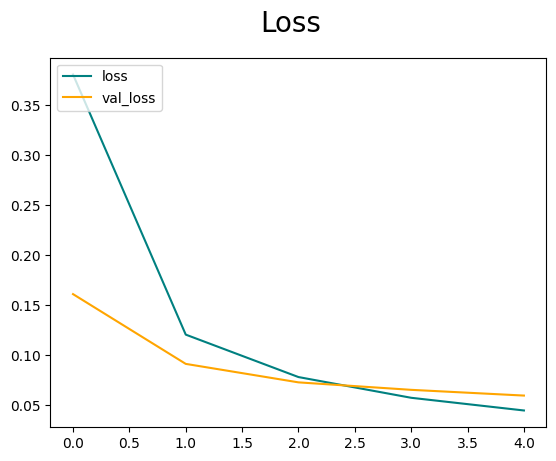

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**Observations:**


*   The CNN model is able to get 98%+ accuracy with just a single convolution layer.
*   We can also add more Conv2D layers, and also play around with the hyperparameters of the CNN model to increase the accuracy further more.


### **Visualizing the model.**

In [ ]:
# Install the visualkeras library if it's not there for you
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 11.3 MB/s eta 0:00:00


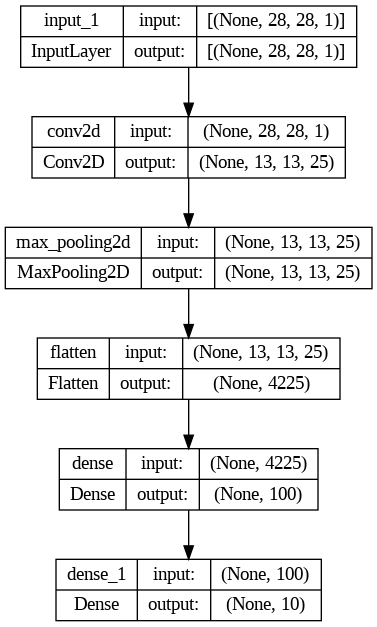

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

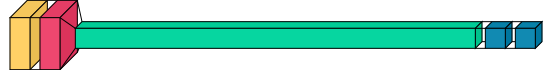

In [ ]:
import visualkeras
visualkeras.layered_view(model)
#visualkeras.layered_view(model, legend=True)

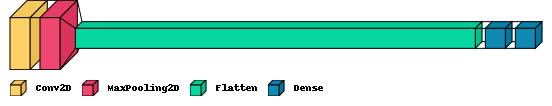

In [ ]:
#Now we will add the legend to the visualization.
visualkeras.layered_view(model, legend=True)

### **Making individual predictions.**

No. of values in test dataset:  10000
1/1 [==============================] - 0s 20ms/step


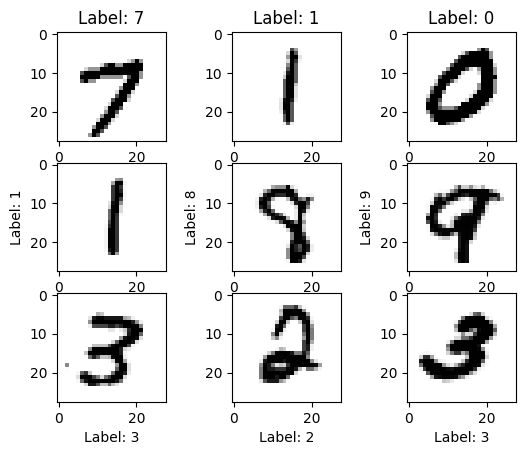

In [ ]:
import random as r
print('No. of values in test dataset: ',X_test.shape[0])
for i in range (9):
  image_index=r.randint(0,10000)
  plt.subplot(331 + i)
  plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
  pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
  if i<3:
    plt.title('Label: ' + str(pred.argmax()))
  elif i>=3 and i<6:
    plt.ylabel('Label: ' + str(pred.argmax()))
  else:
    plt.xlabel('Label: ' + str(pred.argmax()))
plt.show()

This is the individual character prediction from train dataset.

### **Evaluating Keras model.**

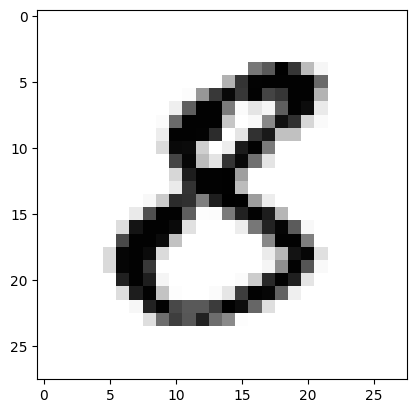

In [ ]:
import time

test = 1234
plt.imshow(X_test[test].reshape(28, 28),cmap='Greys')

In [ ]:
expected_label=Y_test[test].argmax()
digit_image = X_test[test].reshape(1, 28, 28, 1)
# repeat few times to take the average execution time
loop_count = 10

start_time = time.time()
for i in range(loop_count):
    prediction = model.predict(digit_image)
print("Keras inferences with %s second in average" %((time.time() - start_time) / loop_count))

print(prediction)
predicted_label = prediction.argmax()
print('Predicted value:', predicted_label)
if (expected_label == predicted_label):
  print('Correct prediction !')
else:
  print('Wrong prediction !')
#saving keras model
model.save('mnist-model.keras')

1/1 [==============================] - 0s 165ms/step
Keras inferences with 0.20499393939971924 second in average
[[1.74345274e-07 2.29269244e-08 7.89744372e-05 4.48488689e-04
  5.74582426e-09 6.35733828e-03 1.05225015e-04 5.68359670e-09
  9.93009329e-01 4.31787782e-07]]
Predicted value: 8
Correct prediction !


### **Conversion from Keras to ONNX.**
Importing ONNX packages from source.

In [ ]:
#!pip install --upgrade protobuf
!pip install onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 69.8 MB/s eta 0:00:00


In [ ]:
!pip install tf2onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 6.0 MB/s eta 0:00:00


In [ ]:
import onnx
import os
os.environ['TF_KERAS'] = '1'
import tf2onnx

onnx_model_path = 'mnist-model.onnx'

model = keras.models.load_model('mnist-model.keras')
onnx_model, _ = tf2onnx.convert.from_keras(model)
onnx.save(onnx_model, onnx_model_path)

### **Evaluating ONNX model perfomance.**
Inference

In [ ]:
!pip install onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.1 MB/s eta 0:00:00


In [ ]:
import onnxruntime

sess_options = onnxruntime.SessionOptions()
sess = onnxruntime.InferenceSession(onnx_model_path, sess_options)
data = [digit_image.astype(np.float32)]
input_names = sess.get_inputs()
feed = dict([(input.name, data[n]) for n, input in enumerate(sess.get_inputs())])

In [ ]:
start_time = time.time()
for i in range(loop_count):
    onnx_predicted_label = sess.run(None, feed)[0].argmax()
print("ONNX inferences with %s second in average" %((time.time() - start_time) / loop_count))

print('ONNX predicted value:', onnx_predicted_label)
if (expected_label == onnx_predicted_label):
  print('Correct prediction !')
else:
  print('Wrong prediction !')

if (predicted_label == onnx_predicted_label):
  print("The ONNX's and keras' prediction are matching !")
else:
  print("The ONNX's and keras' prediction does not match !")

ONNX inferences with 0.0005838632583618164 second in average
ONNX predicted value: 8
Correct prediction !
The ONNX's and keras' prediction are matching !


Answer the questions below

1. Why have we applied one-hot encoding to Y_train and Y_test?

2. Change the stride of the CNN model by increasing it. What value will you increase it to?

3. After changing the stride what is the number of training parameters of the model and how does it compare to the previous number?

4. Change the training batch size of the model from 128 to 256. Re-train and test the model again, with the new stride and batch size. According to your observations how have these changes impacted the model's performance?  

*References:*

---


* [Medium.com/CNN](https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148)
* [TowardsDataScience.com/CNN](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)
* [Machine Learning & Deep Learning Fundamentals.](https://www.youtube.com/playlist?list=PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU)

QUESTION 1

1. One-hot encoding is applied to Y_train and Y_test because the labels in the MNIST dataset are categorical, representing the digits 0 through 9.  This format allows the model to calculate the probability of each class and compare it with the actual class in a multi-class context. Without one-hot encoding, the model might misinterpret the numerical labels as ordinal values, meaning it might think that class 9 is greater than class 0

QUESTION 2

2. Stride 3

In [ ]:
model = Sequential()
# convolutional layer with increased stride
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(25, kernel_size=(3,3), strides=(3,3), padding='valid', activation='relu'))
# max pooling layer
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 9, 9, 25)          250       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 9, 9, 25)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2025)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               202600    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 203860 (796.33 KB)
Trainable params: 203860 (796.33 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [ ]:
# training the model for 5 epochs
# (input features, target labels, number of samples per iteration of training, number of epochs, val. dataset specs)
hist = model.fit(X_train, Y_train, batch_size=256, epochs=5, validation_data=(X_test, Y_test))

Epoch 1/5
235/235 [==============================] - 6s 22ms/step - loss: 0.4712 - accuracy: 0.8776 - val_loss: 0.2199 - val_accuracy: 0.9391
Epoch 2/5
235/235 [==============================] - 6s 27ms/step - loss: 0.1793 - accuracy: 0.9484 - val_loss: 0.1399 - val_accuracy: 0.9585
Epoch 3/5
235/235 [==============================] - 5s 20ms/step - loss: 0.1237 - accuracy: 0.9638 - val_loss: 0.1104 - val_accuracy: 0.9660
Epoch 4/5
235/235 [==============================] - 6s 24ms/step - loss: 0.0936 - accuracy: 0.9730 - val_loss: 0.0910 - val_accuracy: 0.9708
Epoch 5/5
235/235 [==============================] - 6s 24ms/step - loss: 0.0766 - accuracy: 0.9779 - val_loss: 0.0803 - val_accuracy: 0.9757


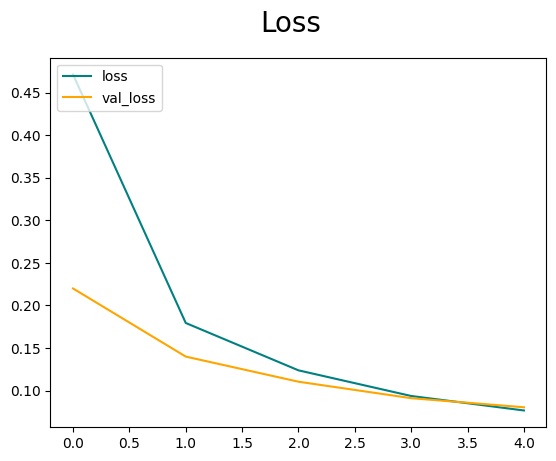

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

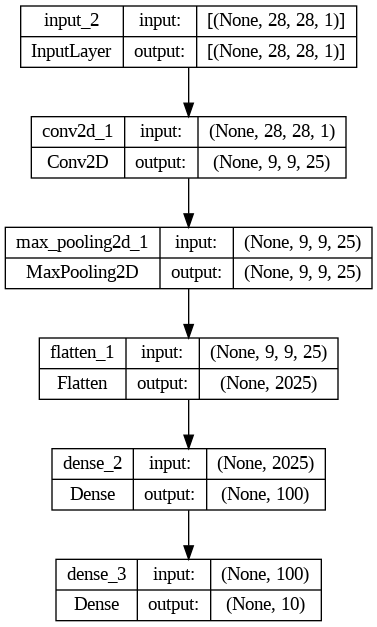

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

QUESTION 3

3. Number of parameters:
(
3
×
3
×
1
+
1
)
×
25
=
(
9
+
1
)
×
25
=
10
×
25
=
250
(3×3×1+1)×25=(9+1)×25=10×25=250

Output Dimensions Calculation:

Stride of 2: Output Dimensions=⌊
2
28−3
​
 ⌋+1=⌊
2
25
​
 ⌋+1=12+1=13

The output feature map size is
13
×
13
×
25
13×13×25.

Stride of 3: Output Dimensions=⌊
3
28−3
​
 ⌋+1=⌊
3
25
​
 ⌋+1=8+1=9

The output feature map size is
9
×
9
×
25
9×9×25.


QUESTION 4

In [ ]:
# Import necessary libraries
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist


In [ ]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255.0

In [ ]:
# One-hot encoding of labels
from tensorflow.keras.utils import to_categorical
n_classes = 10
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)

In [ ]:
# Define the model with stride 3
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(25, kernel_size=(3, 3), strides=(3, 3), padding='valid', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(1, 1)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')



In [ ]:
# Train the model with batch size 256
history = model.fit(X_train, Y_train, batch_size=256, epochs=5, validation_data=(X_test, Y_test))


Epoch 1/5
235/235 [==============================] - 6s 21ms/step - loss: 0.4687 - accuracy: 0.8776 - val_loss: 0.2161 - val_accuracy: 0.9381
Epoch 2/5
235/235 [==============================] - 7s 28ms/step - loss: 0.1854 - accuracy: 0.9462 - val_loss: 0.1451 - val_accuracy: 0.9587
Epoch 3/5
235/235 [==============================] - 7s 28ms/step - loss: 0.1306 - accuracy: 0.9622 - val_loss: 0.1141 - val_accuracy: 0.9652
Epoch 4/5
235/235 [==============================] - 7s 29ms/step - loss: 0.1018 - accuracy: 0.9704 - val_loss: 0.0971 - val_accuracy: 0.9713
Epoch 5/5
235/235 [==============================] - 5s 21ms/step - loss: 0.0844 - accuracy: 0.9751 - val_loss: 0.0977 - val_accuracy: 0.9682


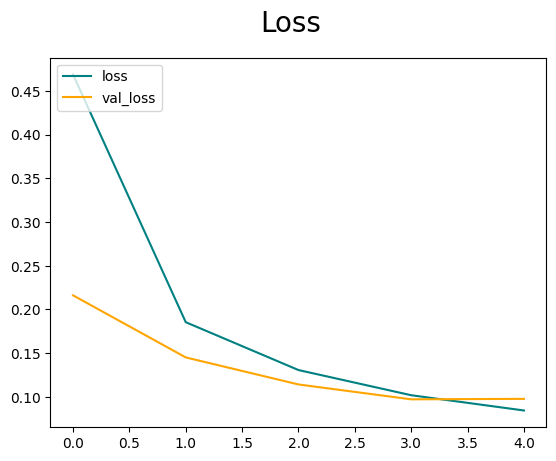

In [ ]:
# Plotting the training history
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

313/313 - 2s - loss: 0.0977 - accuracy: 0.9682 - 2s/epoch - 5ms/step
Test Loss: 0.09766118228435516
Test Accuracy: 0.9682000279426575


Increasing the batch size generally leads to faster training times per epoch because the model processes more samples in parallel. However, larger batch sizes can also lead to less frequent updates of the model's weights, which might affect the convergence.

The **training loss** consistently decreases, indicating that the model is learning effectively.

The **training accuracy** increases significantly, reaching 97.51%, which shows good performance on the training data.

**Reduced Parameters**: With stride 3, the number of parameters is reduced, potentially leading to faster computation and less risk of overfitting.

**Performance Impact**: Despite the reduced number of parameters, the model maintains high accuracy, indicating efficient learning and generalization. The validation accuracy of 96.82% is competitive, suggesting the stride increase did not negatively impact the performance.